# Data importation and Acessing on Loan Application dataset


In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegressionCV 
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [119]:
df=pd.read_csv("C:\\Users\\annab\\OneDrive\\Desktop\\MY PROJECT\\loan prediction\\train.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [120]:
# checking for missing values
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [121]:
#checking for duplicated values
df.duplicated().sum()

0

In [122]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [123]:
# checking that summary the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [124]:
# variable identication


In [125]:
#checking for the dimension od the dataframe
df.shape

(614, 13)

In [126]:
# checking for the percentage of the dataframe 
percentage=(df.isna().sum()/df.shape[0])*100
percentage

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [127]:
# to calculate the percentage 
percentage=(df.isna().sum()/df.shape[0])*100
percentage 
percentage=(df.isna().sum()/df.shape[0])*100
mis_values=df.isna().sum()#missing value
#join the missing value and percntage of the missing values
kas=pd.concat([mis_values,percentage],axis=1,keys=["mis_values","percentage"])
#to check the non misinfg value of the dataset with percentage
kas[kas["mis_values"]>0]

,mis_values,percentage
Gender,13,2.117264
Married,3,0.488599
Dependents,15,2.442997
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Loan_Amount_Term,14,2.280130
Credit_History,50,8.143322


In [128]:
df.head(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


# DATA CLEANING

In [129]:
#FILL IN THE MISSING VALUES IN GENDER WITH CALCULATED MODE
#FIND THE MOST COMMON MISING VALUE
mode=df.Gender.mode()[0] #(because Gender is a categorical variable ie 0,1 or true/false)
df.Gender.fillna(mode,inplace=True)


In [130]:
df.Gender.mode()[0]

'Male'

In [131]:
mode=df.Dependents.mode()[0]
df.Dependents.fillna(mode,inplace=True)

In [132]:
df.Dependents.mode()[0]

'0'

In [133]:
mode=df.Married.mode()[0]
df.Married.fillna(mode,inplace=True)

In [134]:
df.Married.mode()[0]

'Yes'

In [135]:
mode=df.Self_Employed[0]
df.Self_Employed.fillna(mode,inplace=True)

In [136]:
df.Self_Employed.mode()[0]

'No'

In [137]:
LoanAmount_mean=round(df.LoanAmount.mean(),0)# beacuase Loan Amount is a continous variable 
df.LoanAmount.fillna(LoanAmount_mean,inplace=True)


In [138]:
df.LoanAmount

0      146.0
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64

In [139]:
Loan_Amount_Term_mean=round(df.Loan_Amount_Term.mean(),0)
df.Loan_Amount_Term.fillna(Loan_Amount_Term_mean,inplace=True)

In [140]:
df.Loan_Amount_Term

0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
609    360.0
610    180.0
611    360.0
612    360.0
613    360.0
Name: Loan_Amount_Term, Length: 614, dtype: float64

In [141]:
df.Credit_History

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64

In [142]:
Credit_History_mean=round(df.Credit_History.mean(),0)
df.Credit_History.fillna(Credit_History_mean,inplace=True)

# DATA CLEANING

In [143]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [144]:
#df.drop(columns=["CoapplicantIncome"])# dropping CoapplicantIncome because its not needed

# DATA EXPLORATION

# UNIVARIANT ANALYSIS

In [145]:
Gender=df["Gender"].value_counts()
Gender

Male      502
Female    112
Name: Gender, dtype: int64

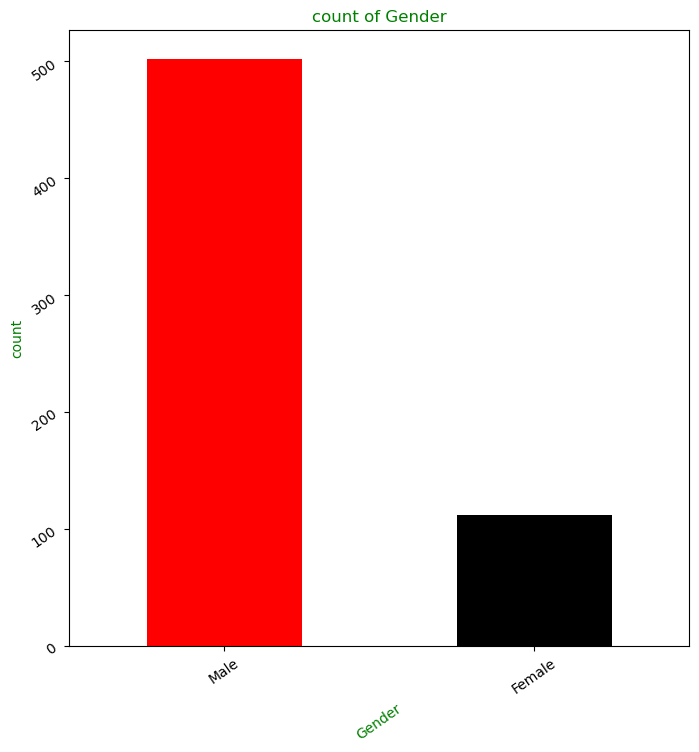

In [146]:
# using pandas plot
Gender.plot(kind="bar", color = ["red","black"], figsize = (8,8))
plt.title("count of Gender", color = "green")
plt.ylabel("count",color="green")
plt.xlabel("Gender", color = "green", rotation = 35)
plt.tick_params(axis ="y", rotation = 35, labelcolor = "black")
plt.tick_params(axis ="x", rotation = 35, labelcolor ="black" )



plt.show()# to remove all the inscription that comes along the chart

<AxesSubplot:>

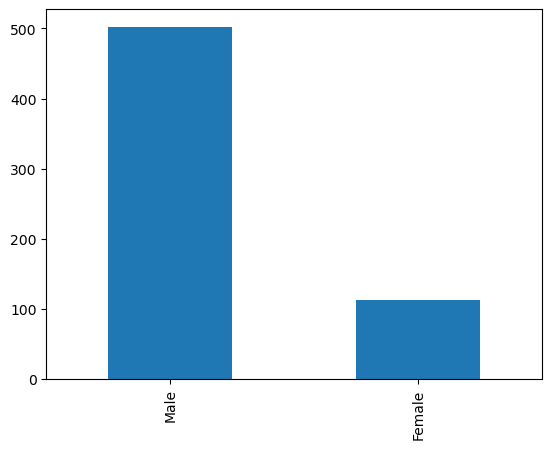

In [147]:
Gender.plot(kind="bar")

In [148]:
Marital_status=df["Married"].value_counts()
Marital_status.index=("Married","Not_married")
Marital_status

Married        401
Not_married    213
Name: Married, dtype: int64

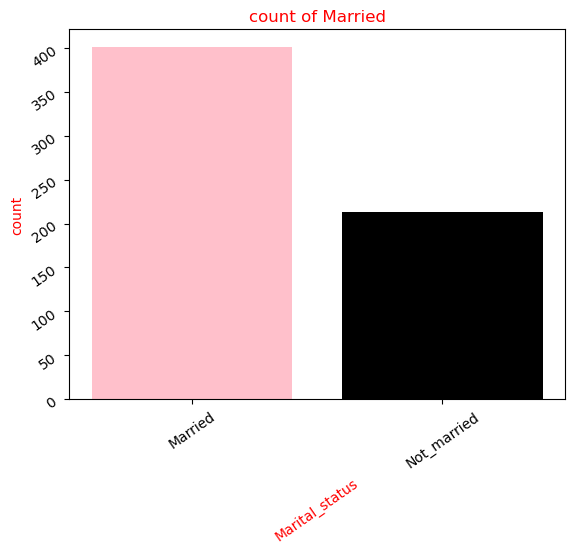

In [149]:
# USING MATPLOT
plt.bar(x=Marital_status.index,height=Marital_status.values,color=["pink","black"])
plt.title("count of Married",color="red")
plt.ylabel("count",color="red")
plt.xlabel("Marital_status", color = "red", rotation = 35)
plt.tick_params(axis ="y", rotation = 35, labelcolor = "black")
plt.tick_params(axis ="x", rotation = 35, labelcolor ="black" )


plt.show()# to remove all the inscription that comes along the chart

# CHECK FOR OUTLIERS APPLICATION
An unusually high or low piece of data could be an outlier.For example, if you have these numbers in ascending order: 3, 6, 7, 10 and 54, you can see that 54 is a lot larger than the rest of the data points,so therefore 54 is an outlier

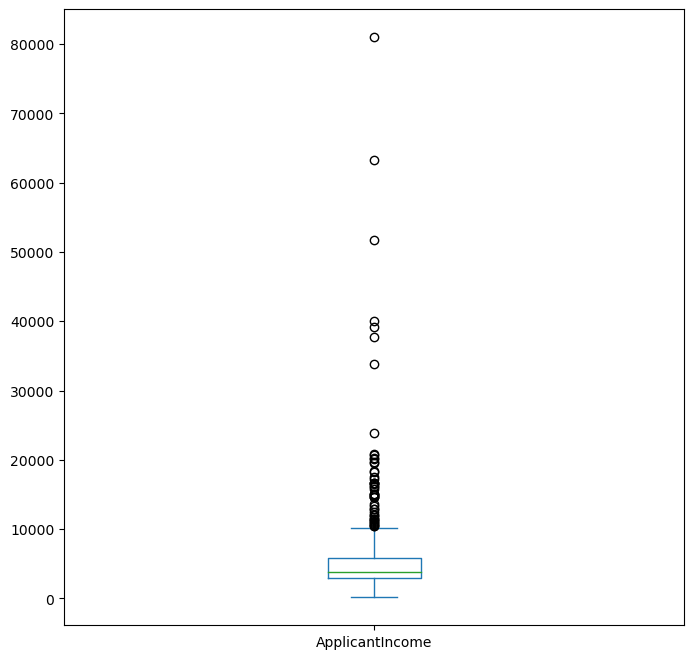

In [150]:
df["ApplicantIncome"].plot(kind="box",figsize=(8,8))
plt.show()

In [151]:
#statistical calclulation for outliers
q1= np.quantile(df["ApplicantIncome"],0.25)
q3= np.quantile(df["ApplicantIncome"],0.75)
iqr = q3-q1
cut_off = iqr * 1.5

upper_band = q3 + cut_off

lower_band = q1 - cut_off

In [152]:
lower_band

-1498.75

In [153]:
upper_band

10171.25

In [154]:
#replace all the outlier with upperband value
df.loc[df["ApplicantIncome"]>upper_band,"ApplicantIncome"]=upper_band

<AxesSubplot:>

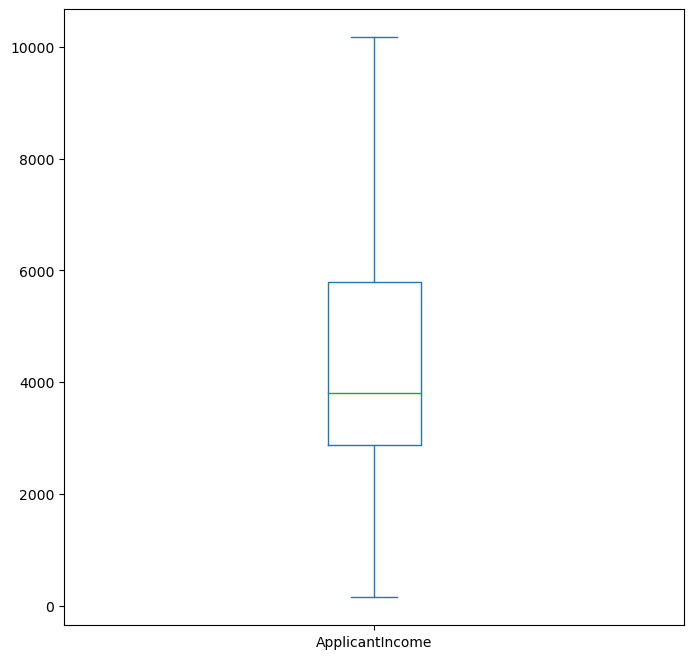

In [155]:
df["ApplicantIncome"].plot(kind="box",figsize=(8,8))

# Variable Transformation

In [156]:
df=pd.get_dummies(df,columns=["Gender","Married","Education","Self_Employed","Property_Area"],drop_first=True)
df

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,5849.0,0.0,146.0,360.0,1.0,Y,1,0,0,0,0,1
1,LP001003,1,4583.0,1508.0,128.0,360.0,1.0,N,1,1,0,0,0,0
2,LP001005,0,3000.0,0.0,66.0,360.0,1.0,Y,1,1,0,1,0,1
3,LP001006,0,2583.0,2358.0,120.0,360.0,1.0,Y,1,1,1,0,0,1
4,LP001008,0,6000.0,0.0,141.0,360.0,1.0,Y,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,2900.0,0.0,71.0,360.0,1.0,Y,0,0,0,0,0,0
610,LP002979,3+,4106.0,0.0,40.0,180.0,1.0,Y,1,1,0,0,0,0
611,LP002983,1,8072.0,240.0,253.0,360.0,1.0,Y,1,1,0,0,0,1
612,LP002984,2,7583.0,0.0,187.0,360.0,1.0,Y,1,1,0,0,0,1


In [157]:
# remove the + in dependent column
func=lambda x:x.strip("+")
df["Dependents"]=df.Dependents.apply(func)

# convert the dependent to int
df["Dependents"]=df.Dependents.astype(int)

In [158]:
#Treatment of imbalance data

In [159]:
y.value_counts()# majority class is sthe higher value while the minority class is the lower value

1    422
0    192
Name: Loan_Status, dtype: int64

#The class of Y(majority) is more than the class of N(minority).For this reason we will perform oversampling.ie bring the minority class upto the majority class

In [166]:
Majority_class=df[df["Loan_Status"]=="Y"]
Minority_class=df[df["Loan_Status"]=="N"] 

from sklearn.utils import resample

resample(Minority_class,n_samples=len(Majority_class),random_state=42)
Minority_class_upsample=resample(Minority_class,n_samples=len(Majority_class),random_state=42)
df=pd.concat([Majority_class,Minority_class_upsample],axis=0)


In [167]:
df

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,5849.0,0.0,146.0,360.0,1.0,Y,1,0,0,0,0,1
2,LP001005,0,3000.0,0.0,66.0,360.0,1.0,Y,1,1,0,1,0,1
3,LP001006,0,2583.0,2358.0,120.0,360.0,1.0,Y,1,1,1,0,0,1
4,LP001008,0,6000.0,0.0,141.0,360.0,1.0,Y,1,0,0,0,0,1
5,LP001011,2,5417.0,4196.0,267.0,360.0,1.0,Y,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,LP001532,2,2281.0,0.0,113.0,360.0,1.0,N,1,1,1,0,0,0
489,LP002556,0,2435.0,0.0,75.0,360.0,1.0,N,1,0,0,0,0,1
589,LP002926,2,2726.0,0.0,106.0,360.0,0.0,N,1,1,0,1,1,0
186,LP001641,1,2178.0,0.0,66.0,300.0,0.0,N,1,1,0,1,0,0


In [169]:
df.drop(columns=["Loan_ID"],inplace=True)


In [170]:
#SPLIT THE DATASET INTO FEATURES AND TARGET
y=df.pop("Loan_Status")# TARGET
x=df.copy()

In [171]:
# perform data scaling
mm=MinMaxScaler()
x_=mm.fit_transform(x)

In [172]:
pd.DataFrame(x_)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,0.568692,0.000000,0.198263,0.743590,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.000000,0.284396,0.000000,0.082489,0.743590,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2,0.000000,0.242784,0.056592,0.160637,0.743590,1.0,1.0,1.0,1.0,0.0,0.0,1.0
3,0.000000,0.583760,0.000000,0.191027,0.743590,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.666667,0.525583,0.100703,0.373372,0.743590,1.0,1.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
839,0.666667,0.212648,0.000000,0.150507,0.743590,1.0,1.0,1.0,1.0,0.0,0.0,0.0
840,0.000000,0.228015,0.000000,0.095514,0.743590,1.0,1.0,0.0,0.0,0.0,0.0,1.0
841,0.666667,0.257054,0.000000,0.140376,0.743590,0.0,1.0,1.0,0.0,1.0,1.0,0.0
842,0.333333,0.202370,0.000000,0.082489,0.615385,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [173]:
# change the Y and N in Loan_status to 1 and 0
rel={"Y":1,"N":0}
y=y.map(rel)

In [174]:
df.corr() #to show if there is relationship betwen two columns either upward or downward direction 

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
Dependents,1.000000,0.006768,0.199084,0.144883,-0.160337,-0.059311,0.098981,0.256954,0.024734,0.083565,0.015867,0.035489
ApplicantIncome,0.006768,1.000000,-0.229720,0.540376,0.050261,0.082682,0.104239,0.005631,-0.235042,0.215715,-0.034965,-0.059162
CoapplicantIncome,0.199084,-0.229720,1.000000,0.277424,-0.241614,0.047678,-0.087905,-0.027910,-0.086256,-0.036435,-0.065946,0.135420
LoanAmount,0.144883,0.540376,0.277424,1.000000,-0.005180,0.050834,0.080866,0.077860,-0.201737,0.052162,-0.055995,-0.005801
Loan_Amount_Term,-0.160337,0.050261,-0.241614,-0.005180,1.000000,-0.021672,-0.049546,-0.078749,-0.059551,-0.020872,0.055999,-0.100467
Credit_History,-0.059311,0.082682,0.047678,0.050834,-0.021672,1.000000,0.038154,-0.007280,-0.129088,-0.006262,0.005782,-0.041431
Gender_Male,0.098981,0.104239,-0.087905,0.080866,-0.049546,0.038154,1.000000,0.359281,0.026064,-0.005071,-0.066287,-0.034868
Married_Yes,0.256954,0.005631,-0.027910,0.077860,-0.078749,-0.007280,0.359281,1.000000,0.007672,0.016948,0.064918,-0.025180
Education_Not Graduate,0.024734,-0.235042,-0.086256,-0.201737,-0.059551,-0.129088,0.026064,0.007672,1.000000,-0.011027,-0.043242,-0.031852
Self_Employed_Yes,0.083565,0.215715,-0.036435,0.052162,-0.020872,-0.006262,-0.005071,0.016948,-0.011027,1.000000,0.035878,-0.004546


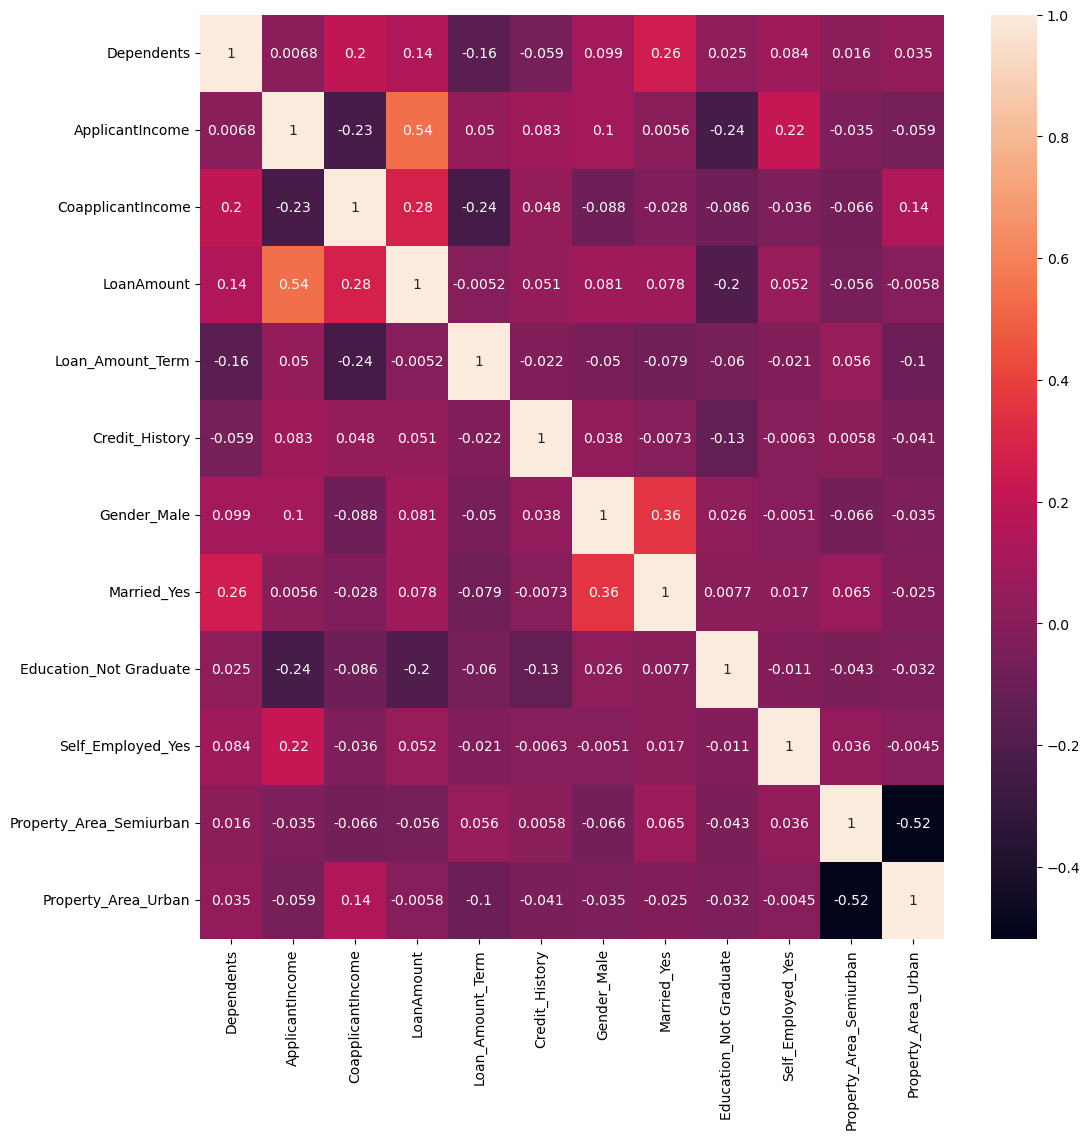

In [175]:
# check for data correlation within the features
#A heat map is a two-dimensional representation of data in which values are represented by colors.
cor=df.corr()# checking correlation
sns.heatmap(cor,annot=True)# ploting using heatmap from seaborn library
fig=plt.gcf()
fig.set_size_inches(12,12)


In [176]:
x_train,x_val,y_train, y_val=train_test_split(x_,y,test_size=0.2,random_state=42)

# BUILD MODEL USING DECISIONTREECLASSIFIER

In [177]:

dt=DecisionTreeClassifier()
model=dt.fit(x_train, y_train)

In [178]:
# MAKE PREDICTION
y_pred=model.predict(x_val)

In [179]:
accuracy_score(y_val,y_pred)

0.8461538461538461

In [180]:
confusion_matrix(y_val,y_pred)

array([[79,  6],
       [20, 64]], dtype=int64)